In [1]:
#Importing dependencies 
import pandas as pd
import os 
import pprint
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importing csv from Resources 
path = 'Resources/VISTA_cleaned.csv'
Vista = pd.read_csv(path)

city_line_path = 'Resources/Station_line _map.csv'
City_line = pd.read_csv(city_line_path)

/var/folders/zh/1g9r_87s0_b2prpx9v3501kr0000gn/T/ipykernel_82070/966131605.py:3: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  Vista = pd.read_csv(path)


In [3]:
City_line

,Zone,Line name,Station,City council
0,2,Sunbury line,Sunbury,Hume C
1,2,Sunbury line,Diggers Rest,Hume C
2,2,Sunbury line,Watergardens,Brimbank C
3,2,Sunbury line,Keilor Plains,Brimbank C
4,2,Sunbury line,St Albans,Brimbank C
...,...,...,...,...
359,1,Williamstown line,Flagstaff,Melbourne C
360,1,Williamstown line,Melbourne Central,Melbourne C
361,1,Williamstown line,Parliament,Melbourne C
362,1,Williamstown line,Southern Cross,Melbourne C


In [4]:
Vista

,Trip_ID,Person_ID,Year,Total_Stops,Trip_Count,Start_Time,Arrival_Time,Trip_Time,Travel_Time,Wait_Time,...,Mode_5,Mode_6,Mode_7,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7
0,Y12H0000101P01T01,Y12H0000101P01,2012.0,1.0,1.0,525.0,545.0,20.0,20.0,0.0,...,0,0,0,20.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Y12H0000101P01T02,Y12H0000101P01,2012.0,1.0,2.0,1050.0,1075.0,25.0,25.0,0.0,...,0,0,0,25.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Y12H0000101P02T01,Y12H0000101P02,2012.0,1.0,1.0,500.0,520.0,20.0,20.0,0.0,...,0,0,0,20.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Y12H0000101P02T02,Y12H0000101P02,2012.0,1.0,2.0,540.0,550.0,10.0,10.0,0.0,...,0,0,0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Y12H0000101P02T03,Y12H0000101P02,2012.0,1.0,3.0,600.0,610.0,10.0,10.0,0.0,...,0,0,0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207742,Y20H4001029P02T01,Y20H4001029P02,2020.0,1.0,1.0,600.0,620.0,20.0,20.0,0.0,...,0,0,0,20.0,0.0,0.0,0.0,0.0,0.0,0.0
207743,Y20H4001029P02T02,Y20H4001029P02,2020.0,1.0,2.0,625.0,640.0,15.0,15.0,0.0,...,0,0,0,15.0,0.0,0.0,0.0,0.0,0.0,0.0
207744,Y20H4001039P01T01,Y20H4001039P01,2020.0,1.0,1.0,540.0,550.0,10.0,10.0,0.0,...,0,0,0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
207745,Y20H4001039P01T02,Y20H4001039P01,2020.0,1.0,2.0,590.0,650.0,60.0,60.0,0.0,...,0,0,0,60.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#Checking columns in dataset
Vista.columns

Index(['Trip_ID', 'Person_ID', 'Year', 'Total_Stops', 'Trip_Count',
       'Start_Time', 'Arrival_Time', 'Trip_Time', 'Travel_Time', 'Wait_Time',
       'Duration', 'Total_Distance', 'Original_Place_1', 'Original_Place_2',
       'Original_Purpose_1', 'Original_Purpose_2', 'Destination_1',
       'Destination_2', 'Dest_Purpose_1', 'Dest_Purpose_2', 'Starting_LGA',
       'Ending_LGA', 'Trip_Purpose', 'Link_Mode', 'Dist_1', 'Dist_2', 'Dist_3',
       'Dist_4', 'Dist_5', 'Dist_6', 'Dist_7', 'Mode_1', 'Mode_2', 'Mode_3',
       'Mode_4', 'Mode_5', 'Mode_6', 'Mode_7', 'Time_1', 'Time_2', 'Time_3',
       'Time_4', 'Time_5', 'Time_6', 'Time_7'],
      dtype='object')

In [6]:
LGA_list = ['Mornington Peninsula S','Nillumbik S','Cardinia S',
            'Knox C','Yarra Ranges S','Frankston C','Moreland C',
            'Port Phillip C','Wyndham C','Merri-Bec C','Maroondah C',
            'Casey C','Kingston C','Banyule C','Hobsons Bay C','Moonee Valley C',
            'Greater Dandenong C','Whitehorse C','Brimbank C','Bayside C',
            'Darebin C','Stonnington C','Maribyrnong C','Hume C','Glen Eira C','Boroondara C',
            'Monash C','Yarra C','Whittlesea C','Melbourne C']

In [7]:
#Delete rows of LGA that arent needed
for lga in Vista['Starting_LGA'].unique():
    if lga not in LGA_list:
        print(f"Dropping {lga} from dataframe")
        Vista = Vista.drop(Vista[Vista['Starting_LGA']== lga].index)
        Vista = Vista.drop(Vista[Vista['Ending_LGA']== lga].index)
Vista['Starting_LGA'].unique()

Dropping Manningham C from dataframe
Dropping nan from dataframe
Dropping Melton C from dataframe
Dropping Greater Geelong C from dataframe
Dropping Macedon Ranges S from dataframe
Dropping Moorabool S from dataframe
Dropping Queenscliffe B from dataframe
Dropping Golden Plains S from dataframe
Dropping Murrindindi S from dataframe
Dropping Surf Coast S from dataframe
Dropping Mitchell S from dataframe


array(['Whittlesea C', 'Banyule C', 'Hume C', 'Yarra C', 'Whitehorse C',
       'Darebin C', 'Knox C', 'Maroondah C', 'Nillumbik S', nan,
       'Maribyrnong C', 'Moreland C', 'Boroondara C', 'Brimbank C',
       'Melbourne C', 'Frankston C', 'Greater Dandenong C', 'Kingston C',
       'Mornington Peninsula S', 'Hobsons Bay C', 'Monash C',
       'Stonnington C', 'Wyndham C', 'Glen Eira C', 'Port Phillip C',
       'Bayside C', 'Casey C', 'Moonee Valley C', 'Yarra Ranges S',
       'Cardinia S'], dtype=object)

## Grouping the data by starting and ending LGA

In [8]:
#Grouping by starting LGA and counting the rows in each group
Start_LGA_df = Vista.groupby(by='Starting_LGA').count().reset_index(drop=False)

In [9]:
#Removing uncessary columns
Start_LGA_df = Start_LGA_df[['Starting_LGA','Trip_ID']]
#Renaming the column for merge later
Start_LGA_df = Start_LGA_df.rename(columns = {'Starting_LGA':'LGA','Trip_ID':'Starting LGA count'})

In [10]:
#Grouping by ending LGA 
Ending_LGA_df = Vista.groupby(by='Ending_LGA').count().reset_index(drop=False)

In [11]:
#Removing uncessary columns
Ending_LGA_df = Ending_LGA_df[['Ending_LGA','Trip_ID']]
#Renaming the column for merge later
Ending_LGA_df = Ending_LGA_df.rename(columns = {'Ending_LGA':'LGA','Trip_ID':'Ending LGA count'})

In [12]:
#Merge the LGA counts dataframes
LGA_count = pd.merge(Start_LGA_df,Ending_LGA_df,on='LGA')

In [13]:
#Sort by increasing starting LGA count
LGA_count = LGA_count.sort_values('Starting LGA count')

In [14]:
#Changing values to log 
LGA_count['Start Log Value'] = np.log2(LGA_count['Starting LGA count'])
LGA_count['End Log Value'] = np.log2(LGA_count['Ending LGA count'])

In [15]:
LGA_count.sort_values('Starting LGA count')

,LGA,Starting LGA count,Ending LGA count,Start Log Value,End Log Value
21,Nillumbik S,2662,2659,11.378295,11.376668
4,Cardinia S,3016,2977,11.558421,11.539644
14,Maribyrnong C,3502,3482,11.773963,11.765700
10,Hobsons Bay C,3837,3819,11.905763,11.898979
1,Bayside C,4305,4296,12.071798,12.068778
27,Yarra C,4668,4670,12.188589,12.189207
22,Port Phillip C,4737,4714,12.209758,12.202736
18,Moonee Valley C,5340,5325,12.382624,12.378566
3,Brimbank C,5356,5350,12.386940,12.385323
28,Yarra Ranges S,5428,5412,12.406205,12.401946


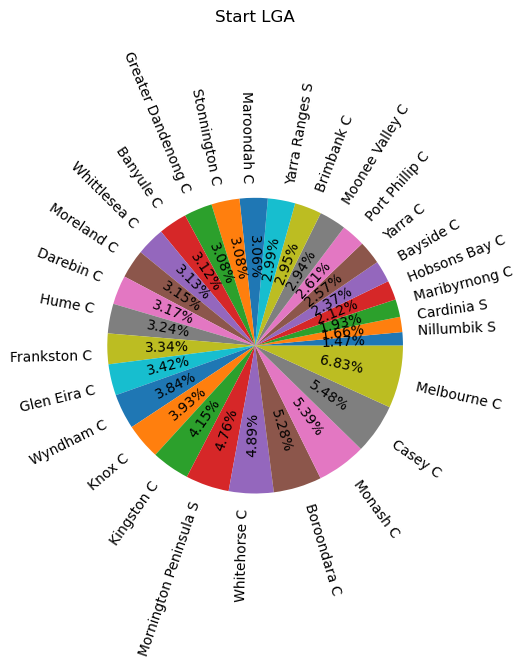

In [16]:
#Create pie chart for melbourne compared to others
labels = LGA_count['LGA'].unique()

sizes = LGA_count['Starting LGA count']


fig, ax = plt.subplots()
patches, labels, pct_texts = ax.pie(sizes,labels=labels,rotatelabels=True,autopct='%1.2f%%')
plt.title('Start LGA',pad=100)

for label, pct_text in zip(labels, pct_texts):
    pct_text.set_rotation(label.get_rotation())
plt.savefig(f"Images/Vista/Vista_Start_LGA_Pie.png")
plt.show()

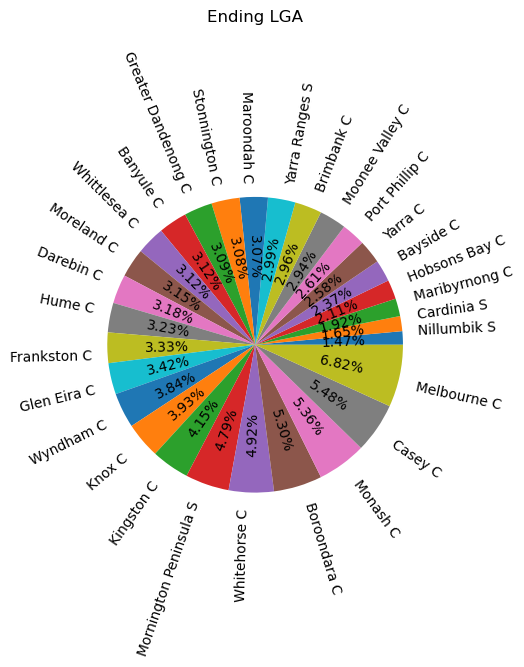

In [17]:
#Create pie chart for melbourne compared to others
labels = LGA_count['LGA'].unique()
sizes2= LGA_count['Ending LGA count']

fig, ax = plt.subplots()
patches, labels, pct_texts = ax.pie(sizes2,labels=labels,rotatelabels=True,autopct='%1.2f%%')
plt.title('Ending LGA',pad=100)

for label, pct_text in zip(labels, pct_texts):
    pct_text.set_rotation(label.get_rotation())
plt.savefig(f"Images/Vista/Vista_End_LGA_Pie.png")
plt.show()

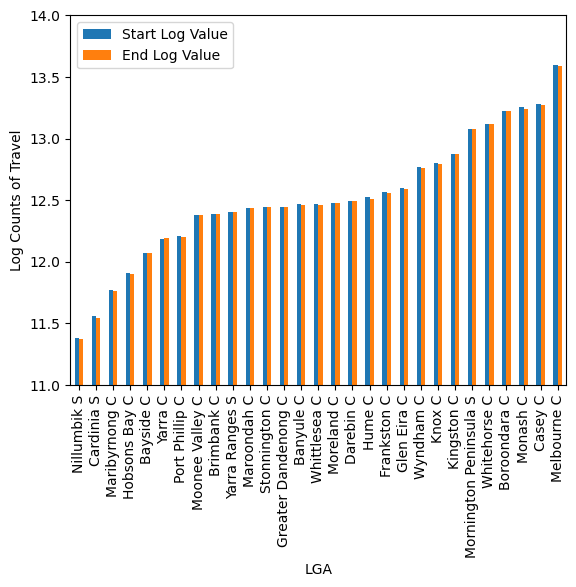

In [18]:
#Plotting log count of travel for each LGA 
LGA_count.plot(kind='bar',x = 'LGA',y=['Start Log Value','End Log Value'],ylabel='Log Counts of Travel')
plt.ylim(11,14)
plt.show()

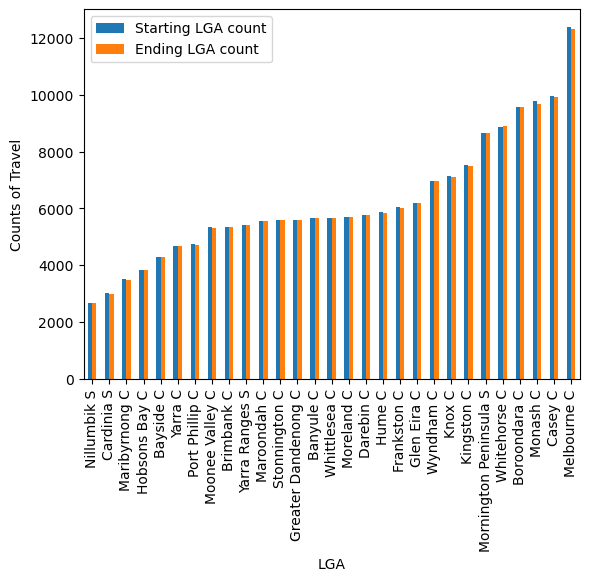

In [19]:
#Plotting counts of travel for each LGA
LGA_count.plot(kind='bar',x = 'LGA',y=['Starting LGA count','Ending LGA count'],ylabel= 'Counts of Travel')
plt.tight_layout
plt.savefig(f"Images/Vista/Vista_LGA_Bargraph.png")
plt.show()

## Grouping by purpose of travel

In [20]:
#Grouping by trip purpose
purpose_travel = Vista.groupby(by = 'Trip_Purpose').count()

In [21]:
#Resetting index and retrieveing only columns trip purpose and trip id
purpose_travel_df = purpose_travel.reset_index(drop=False)[['Trip_Purpose','Trip_ID']]

In [22]:
purpose_travel_df = purpose_travel_df.sort_values(by='Trip_ID')

In [23]:
purpose_travel_df.head()

,Trip_Purpose,Trip_ID
1,At or Go Home,28
11,Unknown Purpose,449
5,Other Purpose,856
7,Pick-up or Deliver Something,3660
3,Change Mode,6446


##

## Checking the usage of Bus, Train, Tram over 2018-2020

In [24]:
#Find the total counts Link_Mode for bus train and trams (The main mode of transport)
Mode_year_df = Vista.groupby(by=['Link_Mode','Year']).count().reset_index()

In [25]:
Mode_year_df.head()

,Link_Mode,Year,Trip_ID,Person_ID,Total_Stops,Trip_Count,Start_Time,Arrival_Time,Trip_Time,Travel_Time,...,Mode_5,Mode_6,Mode_7,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7
0,Bicycle,2012.0,236,236,236,236,236,236,236,236,...,236,236,236,236,236,236,236,236,236,236
1,Bicycle,2013.0,438,438,438,438,438,438,438,438,...,438,438,438,438,438,438,438,438,438,438
2,Bicycle,2014.0,468,468,468,468,468,468,468,468,...,468,468,468,468,468,468,468,468,468,468
3,Bicycle,2015.0,494,494,494,494,494,494,494,494,...,494,494,494,494,494,494,494,494,494,494
4,Bicycle,2016.0,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400


In [26]:
#Taking only years 2018-2020
Mode_year_df = Mode_year_df.loc[((Mode_year_df['Year']==2018)|(Mode_year_df['Year']==2019)|(Mode_year_df['Year']==2020))]

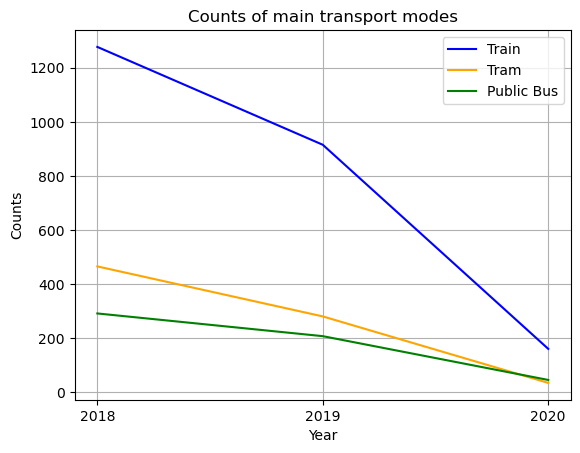

In [27]:
#Plot scatter of counts over time
plt.subplots()
plt.plot(Mode_year_df.loc[Mode_year_df['Link_Mode']=='Train']['Year'],Mode_year_df.loc[Mode_year_df['Link_Mode']=='Train']['Trip_ID'],label='Train',color='Blue')
plt.plot(Mode_year_df.loc[Mode_year_df['Link_Mode']=='Tram']['Year'],Mode_year_df.loc[Mode_year_df['Link_Mode']=='Tram']['Trip_ID'],label='Tram',color='Orange')
plt.plot(Mode_year_df.loc[Mode_year_df['Link_Mode']=='Public Bus']['Year'],Mode_year_df.loc[Mode_year_df['Link_Mode']=='Public Bus']['Trip_ID'],label='Public Bus',color='Green')
plt.xticks((2018,2019,2020))
plt.title('Counts of main transport modes')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.grid()
plt.savefig(f"Images/Vista/Vista_Transport_Passenger_LineGraph.png")
plt.legend()

In [28]:
#Grouping by link mode 
Mode_df = Vista.groupby(by='Link_Mode').count().reset_index()

In [29]:
#Retrieving only rows that either contain train tram or pulbic bus
Mode_df = Mode_df.loc[(Mode_df['Link_Mode']=='Train')|(Mode_df['Link_Mode']=='Tram')|(Mode_df['Link_Mode']=='Public Bus')]
Mode_df

,Link_Mode,Trip_ID,Person_ID,Year,Total_Stops,Trip_Count,Start_Time,Arrival_Time,Trip_Time,Travel_Time,...,Mode_5,Mode_6,Mode_7,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7
5,Public Bus,1828,1828,1828,1828,1828,1828,1828,1828,1828,...,1828,1828,1828,1828,1828,1828,1828,1828,1828,1828
8,Train,8360,8360,8360,8360,8360,8360,8360,8360,8360,...,8360,8360,8360,8360,8360,8360,8360,8360,8360,8360
9,Tram,2461,2461,2461,2461,2461,2461,2461,2461,2461,...,2461,2461,2461,2461,2461,2461,2461,2461,2461,2461


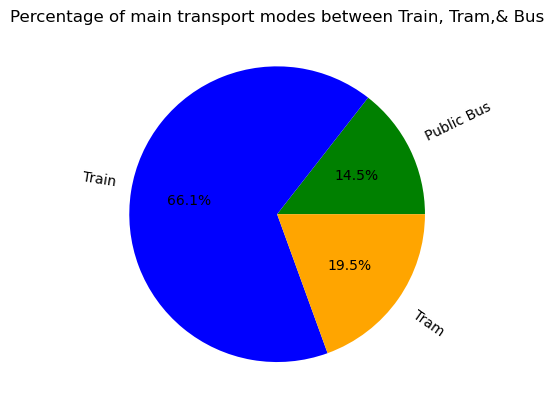

In [30]:
#Plot Pie Graph of main modes of transport used 
labels = Mode_df['Link_Mode'].unique()

sizes = Mode_df['Trip_ID']
fig, ax = plt.subplots()
colors = ['Green','Blue','Orange']
ax.pie(sizes,labels=labels,colors=colors,rotatelabels=True,autopct='%1.1f%%')
plt.title('Percentage of main transport modes between Train, Tram,& Bus')
plt.show()

In [31]:
#Get the counts of Public Bus, Train, Tram in Mode 1 - 10
Bus_counter = 0
Train_counter = 0
Tram_counter = 0

counts_df = Vista[['Mode_1','Mode_2','Mode_3','Mode_4','Mode_5','Mode_6','Mode_7',]]

In [32]:
#Saving counts for each mode into their list
for column in counts_df:
        Bus_counter = Bus_counter + counts_df[column].value_counts()['Public Bus']
        Train_counter = Train_counter + counts_df[column].value_counts()['Train']
        Tram_counter = Tram_counter + counts_df[column].value_counts()['Tram']

In [33]:
#Turn counts into a dataframe to plot
labels = ['Bus','Train','Tram']
counts = [Bus_counter,Train_counter,Tram_counter]
data = {'Mode of Transport':labels,'Counts of Transport':counts}
Mode_counts = pd.DataFrame(data=data)

In [34]:
Mode_counts

,Mode of Transport,Counts of Transport
0,Bus,3536
1,Train,9339
2,Tram,3818


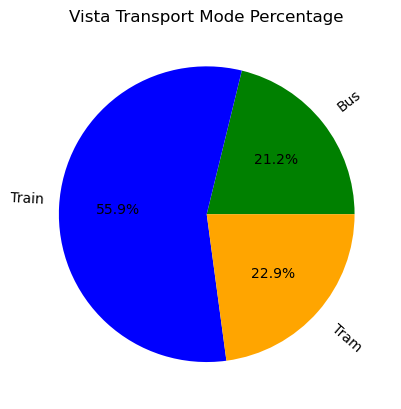

In [45]:
#Plot Pie Graph of Modes used.

sizes = Mode_counts['Counts of Transport']
fig, ax = plt.subplots()
colors = ['Green','Blue','Orange']
ax.pie(sizes,labels=labels,colors=colors,rotatelabels=True,autopct='%1.1f%%')
plt.title('Vista Transport Mode Percentage')
plt.savefig(f"Images/Vista/Vista_Transport_Mode_Pie.png")
plt.show()

In [36]:
test = Vista.groupby(by='Starting_LGA').mean(numeric_only=True).reset_index(drop=False)

In [37]:
test[['Starting_LGA','Travel_Time']]

,Starting_LGA,Travel_Time
0,Banyule C,19.809776
1,Bayside C,18.841580
2,Boroondara C,19.833873
3,Brimbank C,20.963779
4,Cardinia S,21.445955
5,Casey C,20.451830
6,Darebin C,21.256384
7,Frankston C,19.732234
8,Glen Eira C,19.303548
9,Greater Dandenong C,22.058855


<Axes: xlabel='Trip_Purpose'>

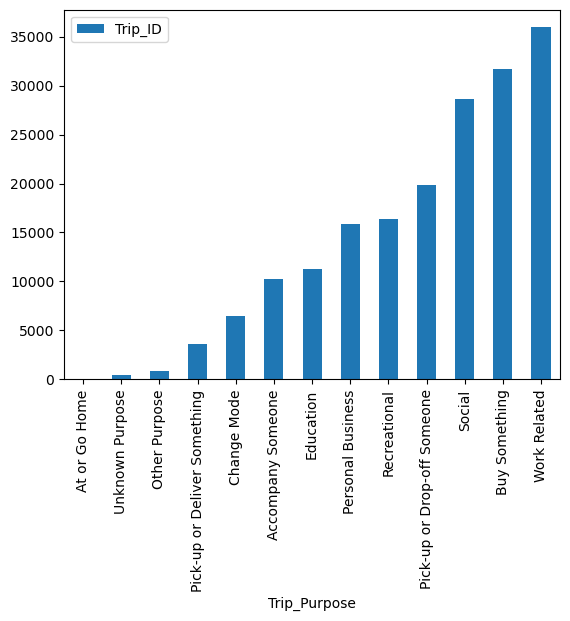

In [38]:
#Create bar graph on trip purpose 
Vista.groupby(by='Trip_Purpose').count().reset_index()[['Trip_Purpose','Trip_ID']].sort_values('Trip_ID').plot(kind='bar',x='Trip_Purpose')

## Checking counts of trips purpose by city council area

In [39]:
test = Vista.groupby(by=['Starting_LGA','Trip_Purpose']).count().reset_index()[['Starting_LGA','Trip_Purpose','Trip_ID']]

In [40]:
#test = test.loc[test['Trip_Purpose']=='Work Related'].sort_values(['Trip_ID'])

In [41]:
test = test.sort_values('Trip_ID')

In [42]:
test = test.pivot(index='Trip_Purpose',columns='Starting_LGA').reset_index()#.plot(kind='bar',legend=False)

In [43]:
test

Trip_Purpose   Trip_ID                         \
Starting_LGA                               Banyule C Bayside C Boroondara C   
0                        Accompany Someone     327.0     298.0        532.0   
1                            At or Go Home       NaN       NaN          NaN   
2                            Buy Something     937.0     722.0       1530.0   
3                              Change Mode      95.0      62.0        234.0   
4                                Education     363.0     197.0        716.0   
5                            Other Purpose      25.0      22.0         57.0   
6                        Personal Business     542.0     453.0        917.0   
7             Pick-up or Deliver Something     118.0      95.0        203.0   
8              Pick-up or Drop-off Someone     677.0     432.0       1065.0   
9                             Recreational     625.0     502.0       1103.0   
10                                  Social     915.0     909.0       1609.0   
11                         Unknown Purpose      10.0       7.0         21.0   
12                            Work Related    1033.0     606.0       1584.0   

                                                                              \
Starting_LGA Brimbank C Cardinia S Casey C Darebin C Frankston C Glen Eira C   
0                 313.0      241.0   640.0     344.0       407.0       376.0   
1                   3.0        1.0     1.0       NaN         NaN         1.0   
2                 928.0      631.0  1900.0    1107.0      1166.0      1014.0   
3                  75.0       23.0    74.0     142.0        69.0       106.0   
4                 411.0      194.0   820.0     368.0       329.0       474.0   
5                  10.0       14.0    27.0      38.0        35.0        33.0   
6                 495.0      311.0  1010.0     452.0       609.0       601.0   
7                  76.0       82.0   183.0      90.0       124.0       129.0   
8                 730.0      322.0  1315.0     579.0       675.0       682.0   
9                 360.0      240.0   785.0     475.0       629.0       637.0   
10                732.0      427.0  1362.0     993.0       927.0      1067.0   
11                 16.0        3.0    21.0      10.0         9.0        11.0   
12               1207.0      527.0  1806.0    1159.0      1086.0      1069.0   

              ...                                                \
Starting_LGA  ... Moreland C Mornington Peninsula S Nillumbik S   
0             ...      344.0                  433.0       179.0   
1             ...        NaN                    1.0         1.0   
2             ...      967.0                 1797.0       452.0   
3             ...      108.0                   88.0        22.0   
4             ...      373.0                  372.0       230.0   
5             ...       31.0                   75.0         8.0   
6             ...      522.0                 1102.0       303.0   
7             ...      107.0                  248.0        58.0   
8             ...      623.0                  822.0       311.0   
9             ...      548.0                 1006.0       256.0   
10            ...      969.0                 1413.0       390.0   
11            ...        2.0                   49.0         5.0   
12            ...     1120.0                 1235.0       447.0   

                                                                               \
Starting_LGA Port Phillip C Stonnington C Whitehorse C Whittlesea C Wyndham C   
0                     230.0         277.0        515.0        336.0     502.0   
1                       2.0           NaN          NaN          NaN       NaN   
2                     713.0        1060.0       1747.0       1024.0    1280.0   
3                     206.0         240.0        162.0         58.0      73.0   
4                     140.0         238.0        617.0        459.0     620.0   
5                      40.0          16.0         45.0         14.0   

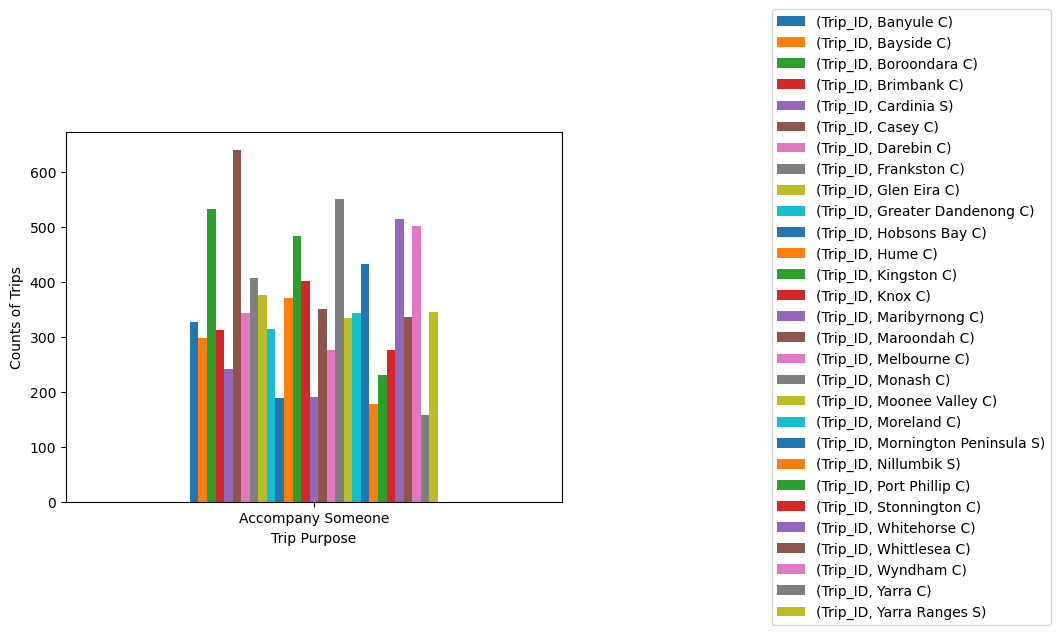

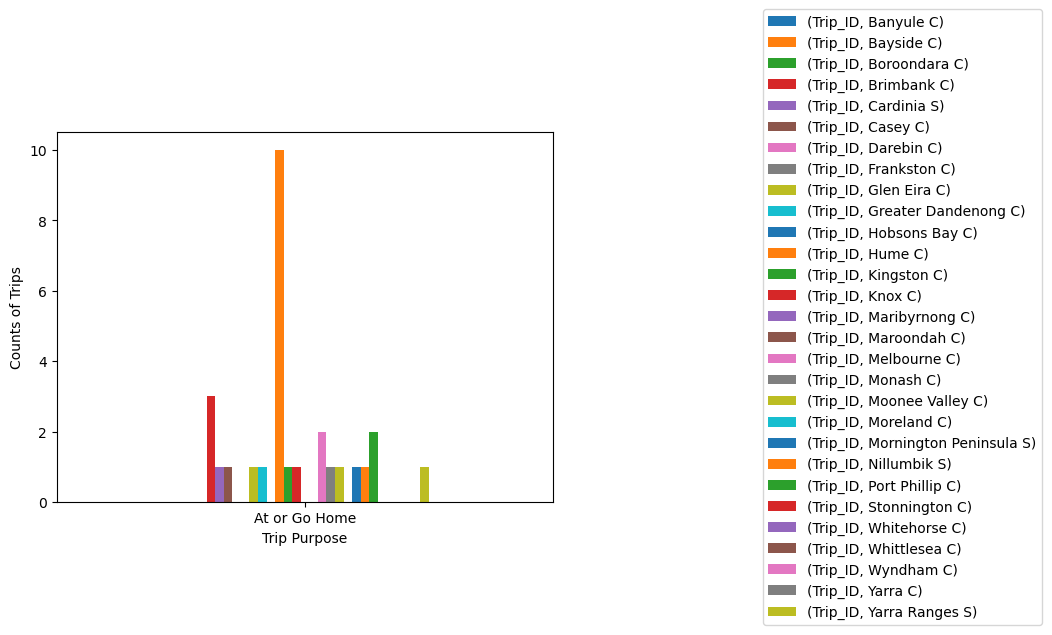

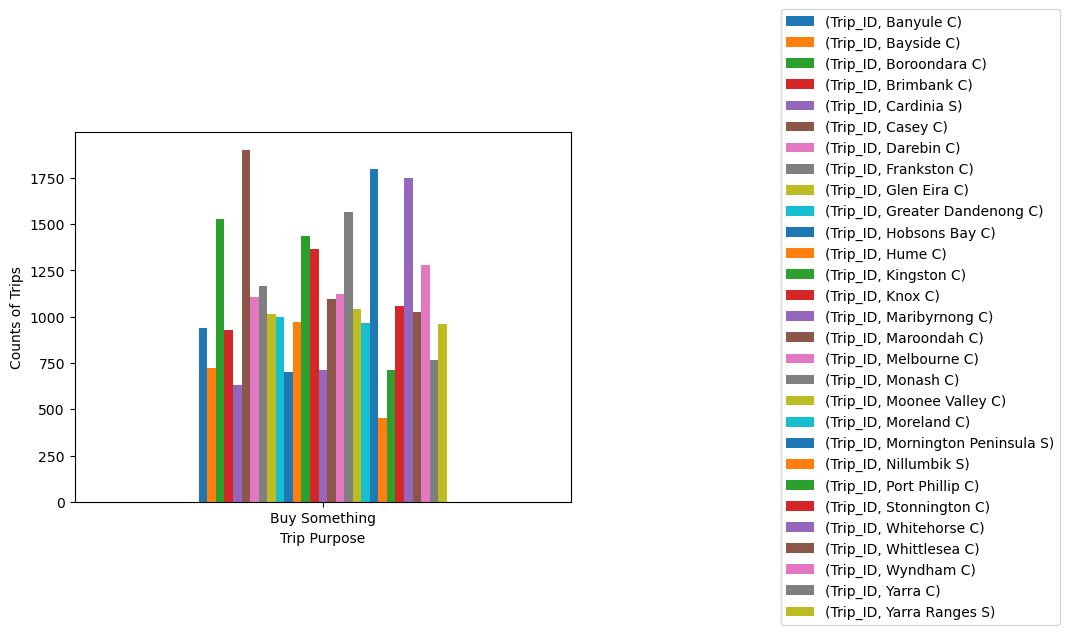

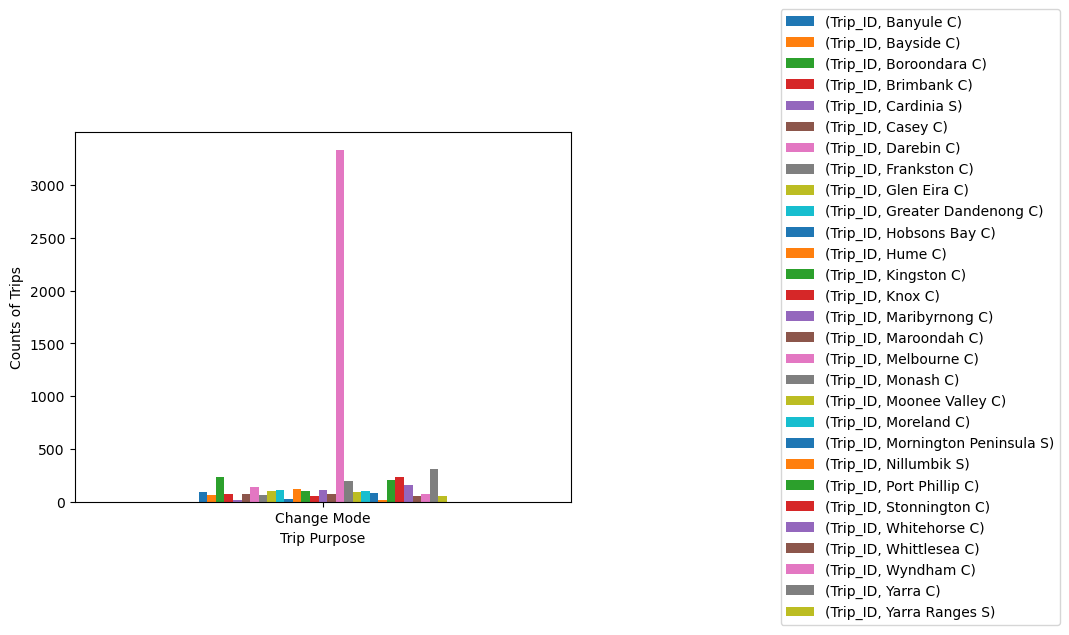

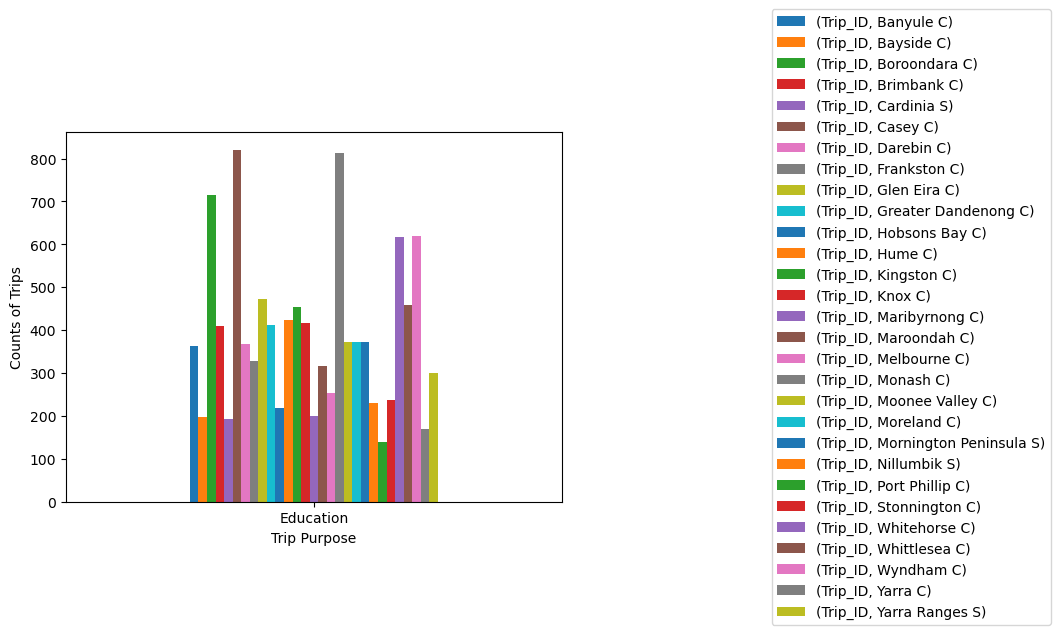

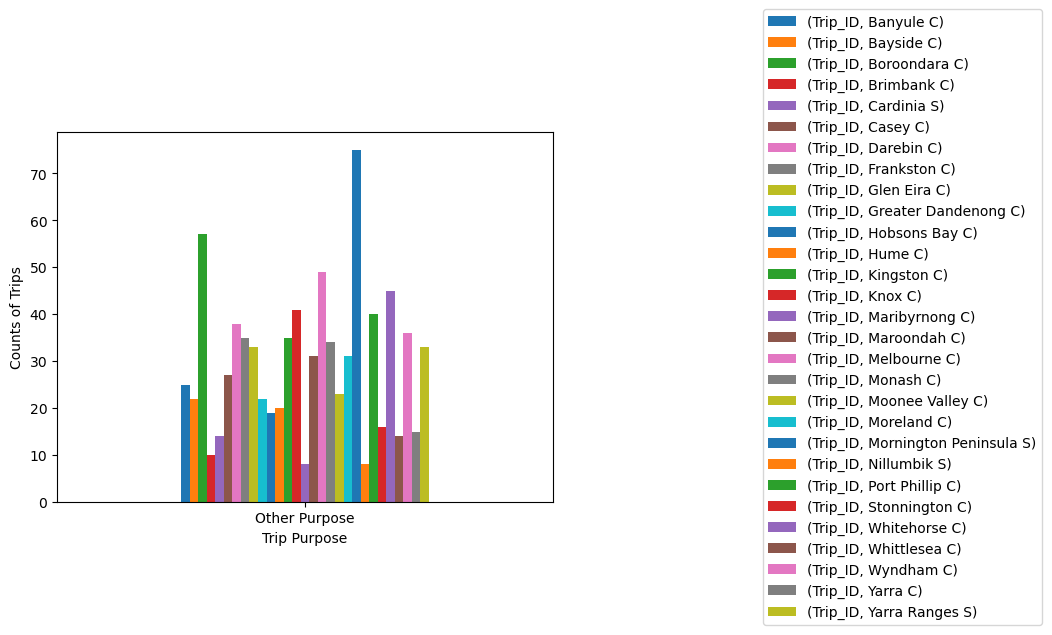

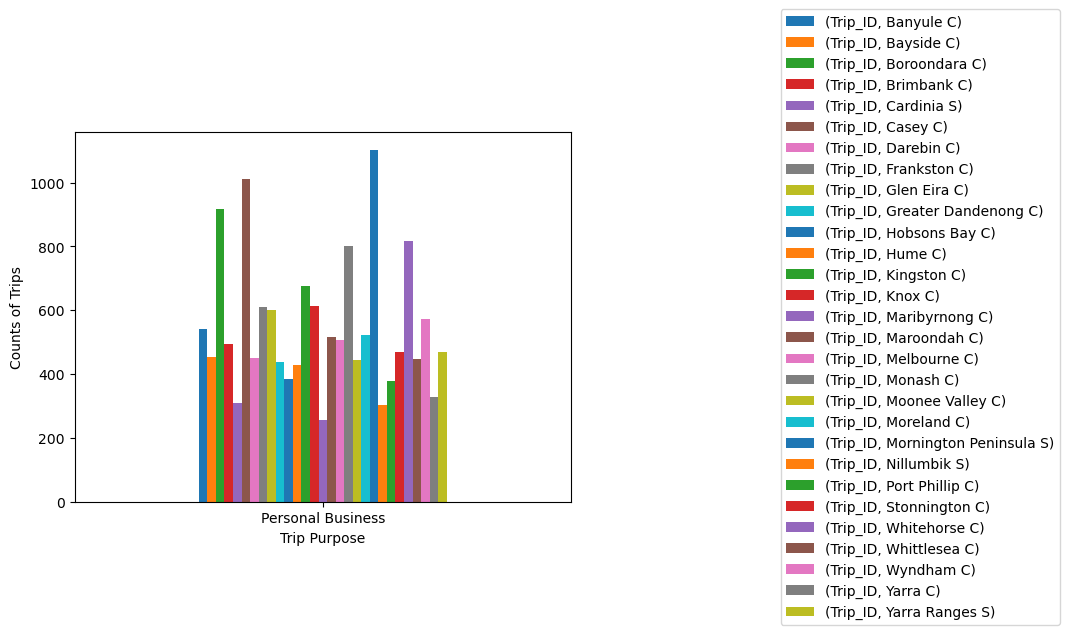

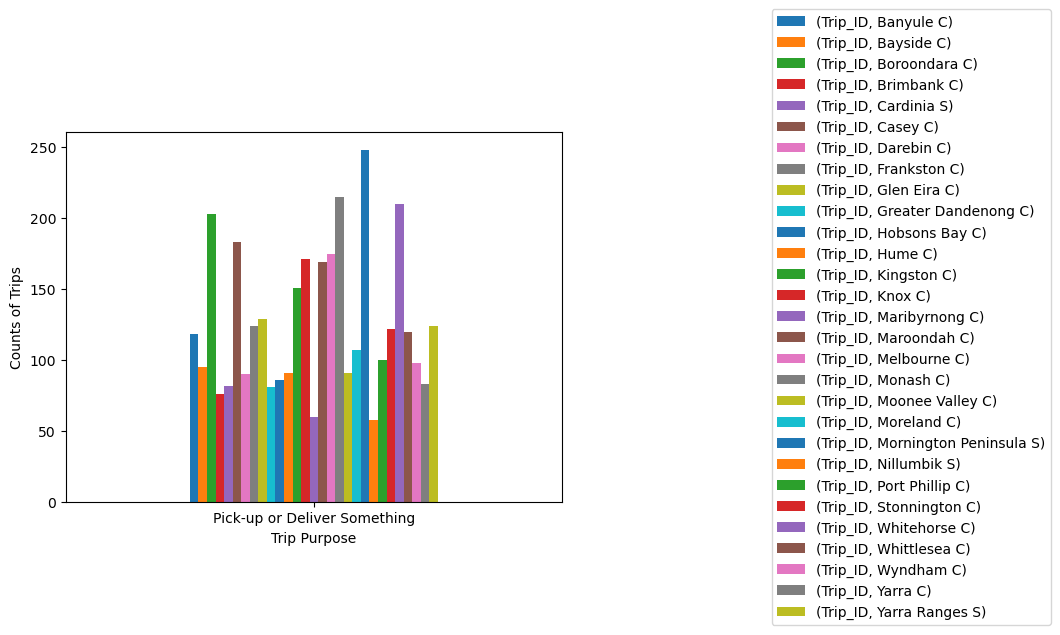

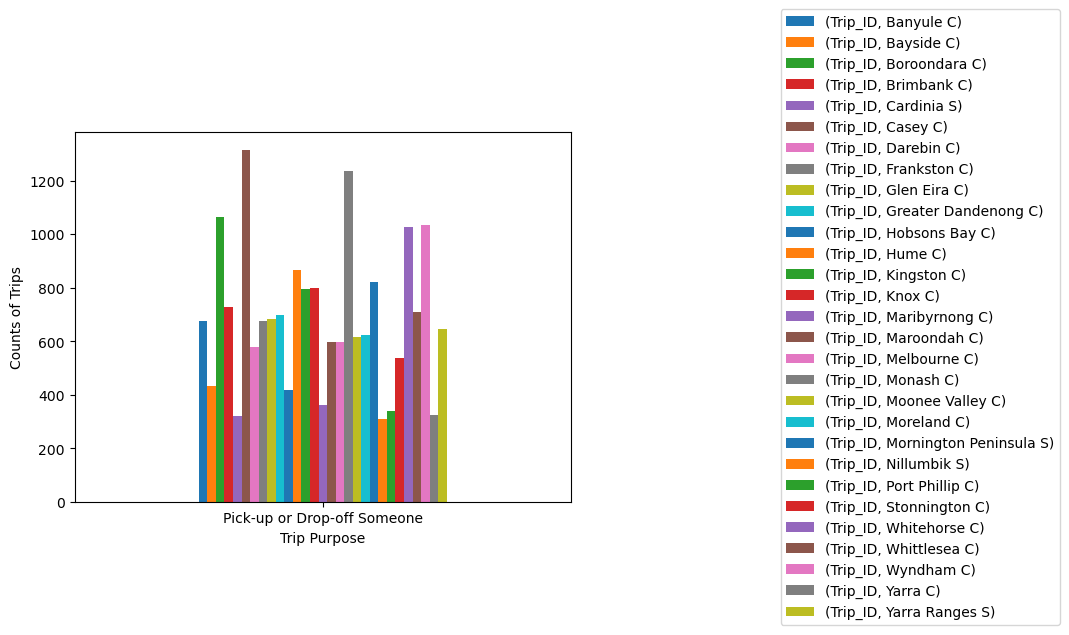

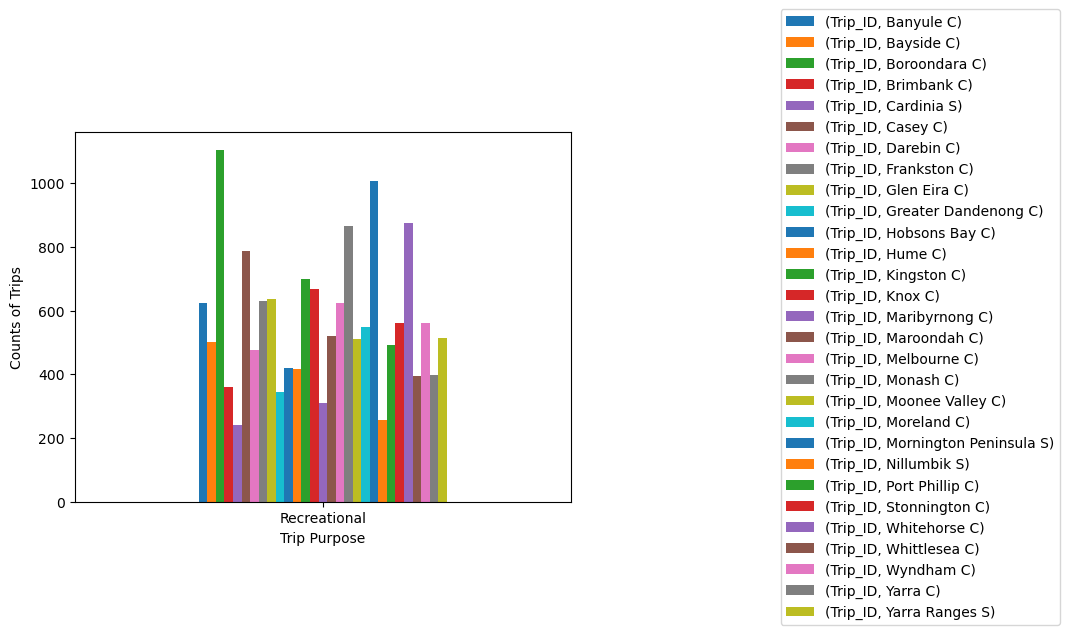

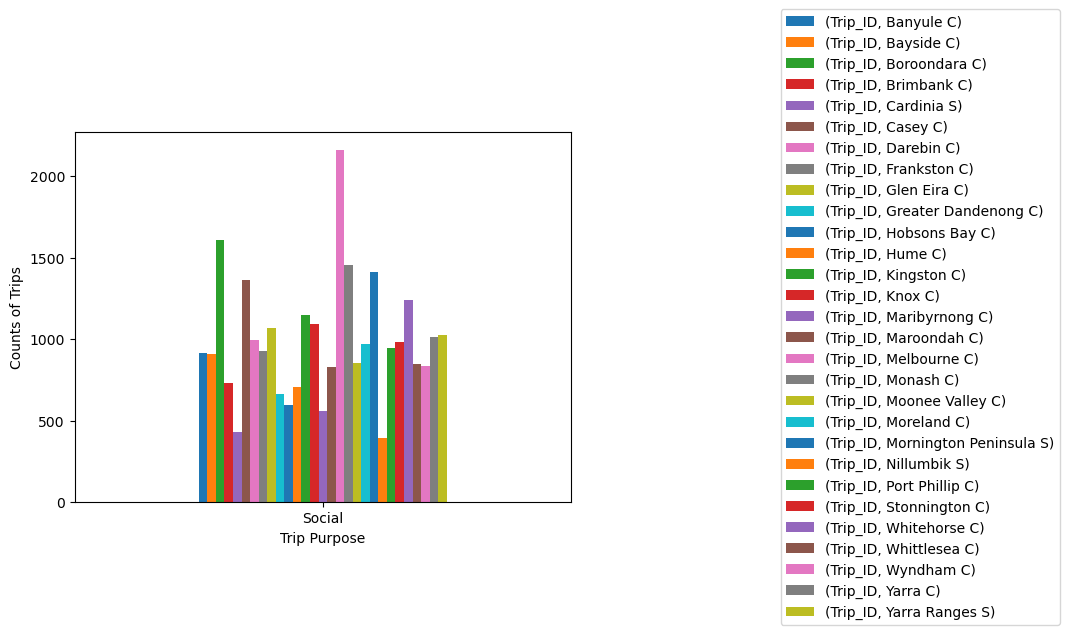

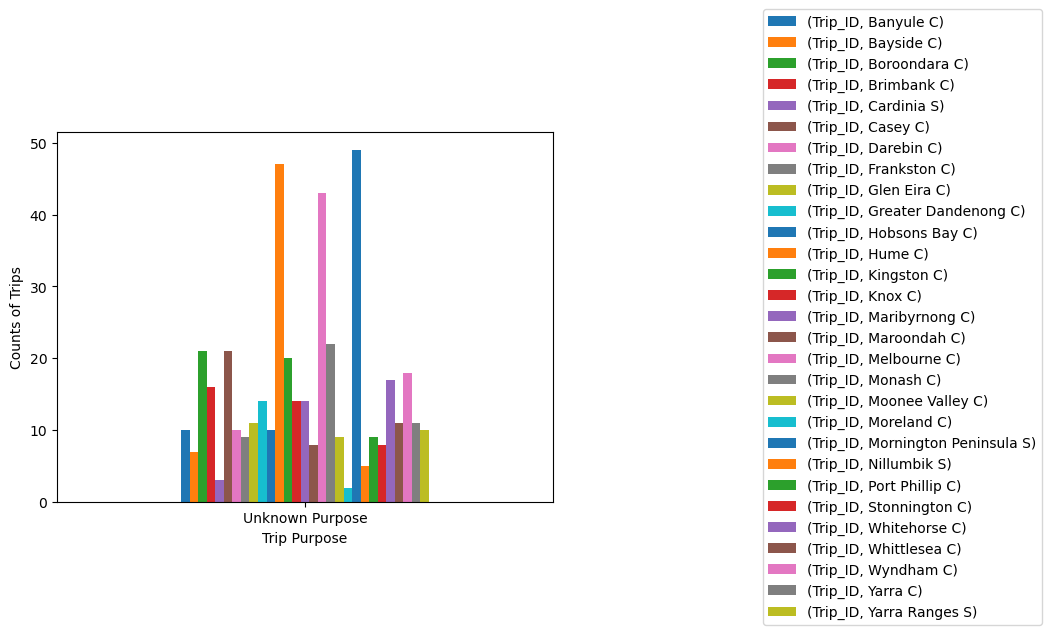

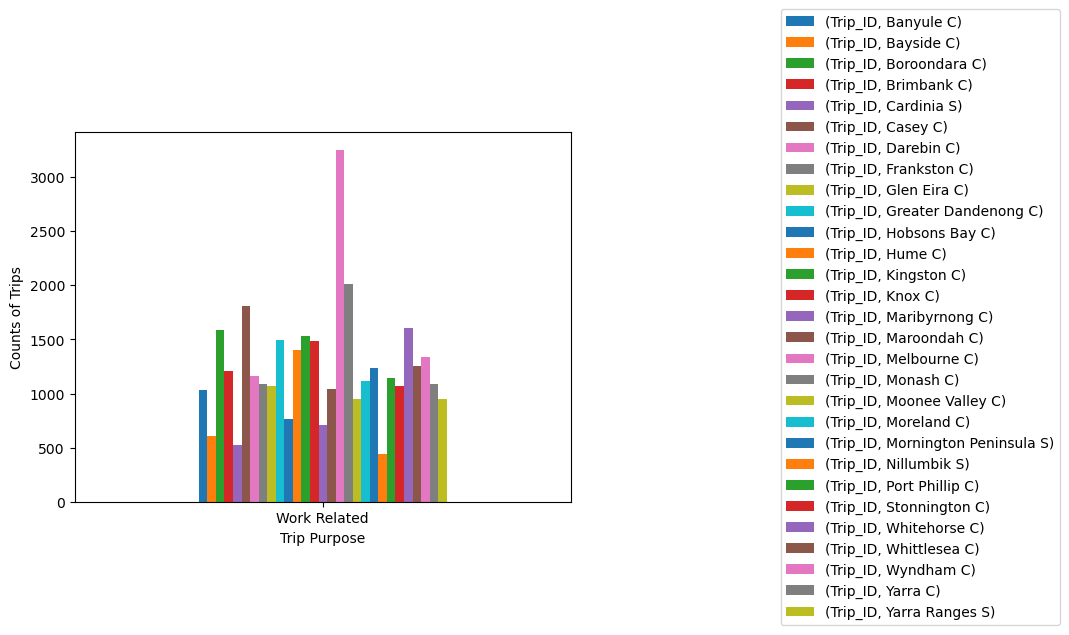

In [44]:
for purpose in test['Trip_Purpose'].unique():
    test.loc[test['Trip_Purpose']==purpose].sort_values(by='Trip_Purpose',axis=0).plot(kind='bar',x ='Trip_Purpose').legend(loc='right',bbox_to_anchor=(2, 0.5))
    plt.xlabel('Trip Purpose')
    plt.ylabel('Counts of Trips')
    plt.xticks(rotation=360)
    plt.tight_layout
    plt.savefig(f"Images/Vista/Vista_{purpose}_bar_.png")